In [1]:
# importing libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# <center>Jupyter Notebook Mastery - Resit exam</center>

# PART ONE - WORKING WITH DATA

You are provided with a dataset which contains different characteristics Spotify songs. You should achieve the following goals:

- find out who are the top 10 artists by number of songs, 
- find out what are the top 10 most streamed songs, 
- explore songs danceability over the years.

You will find cells named `TASK`. They define what task you should perform. Under each task you will find a cell, containing the comment _#YOUR CODE HERE_ in which you should write your solution.

**Good luck!** :)

## Reading the data

<b><font color='#8B0000'>TASK</font></b>

Read the dataset as a Pandas dataframe and show the **first three rows** of it.

Note: You have to read the dataset with **encoding='ISO-8859-1'**

Store the dataset in the variable `spotify_data`.

In [2]:
spotify_data = None
spotify_data = pd.read_csv('./spotify-2023.csv', encoding='ISO-8859-1')
print(spotify_data.head(3))
#YOUR CODE HERE


                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       

# Check the structure of the dataset
<b><font color='#8B0000'>TASK</font></b>

Present the number of rows and number of columns in the dataset in the following format:<br><br> "Number of rows: {rows}, number of columns: {columns}"

In [3]:
#YOUR CODE HERE
print(f"Number of rows: {len(spotify_data)}, number of columns: {len(spotify_data.columns)}")

Number of rows: 953, number of columns: 24


# Find missing values

<b><font color='#8B0000'>TASK</font></b>

Present the **columns** containing missing values and the respective **count of missing values** in each column.

In [4]:
#YOUR CODE HERE

print(spotify_data.isnull().sum()[spotify_data.isnull().sum() != 0])

in_shazam_charts    50
key                 95
dtype: int64


# Fix data types

<b><font color='#8B0000'>TASK</font></b>

Turn non-numeric values from 'streams' column to numeric.

Note: You might need to use **errors='coerce'** in the pd.to_numeric function.

In [7]:
#YOUR CODE HERE
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce').fillna(0).astype(int)

print(spotify_data['streams'].dtype)

int32


# Find Top 10 artists

<b><font color='#8B0000'>TASK</font></b>

Create a variable `top_artists` which contains the **top 10** artists by the **number of times** they appear in the dataset (number of songs).

In [8]:
#YOUR CODE HERE
top_artists = spotify_data['artist(s)_name'].value_counts().head(10)
print(top_artists)

artist(s)_name
Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: count, dtype: int64


<b><font color='#8B0000'>TASK</font></b>

Create a **horizontal bar plot** which presents the Top 10 artists and their respective number of songs.

***REQUIREMENTS:***
- figure DPI should be **140**
 - figure size should be **(7, 5)**
 - figure title should be **'Top 10 artists by number of songs'**
 - x label should be **'Number of songs'**
 - y label should be **'Artists'**
 - top artists should be at the top of the bar plot, bottom artist should be at the bottom

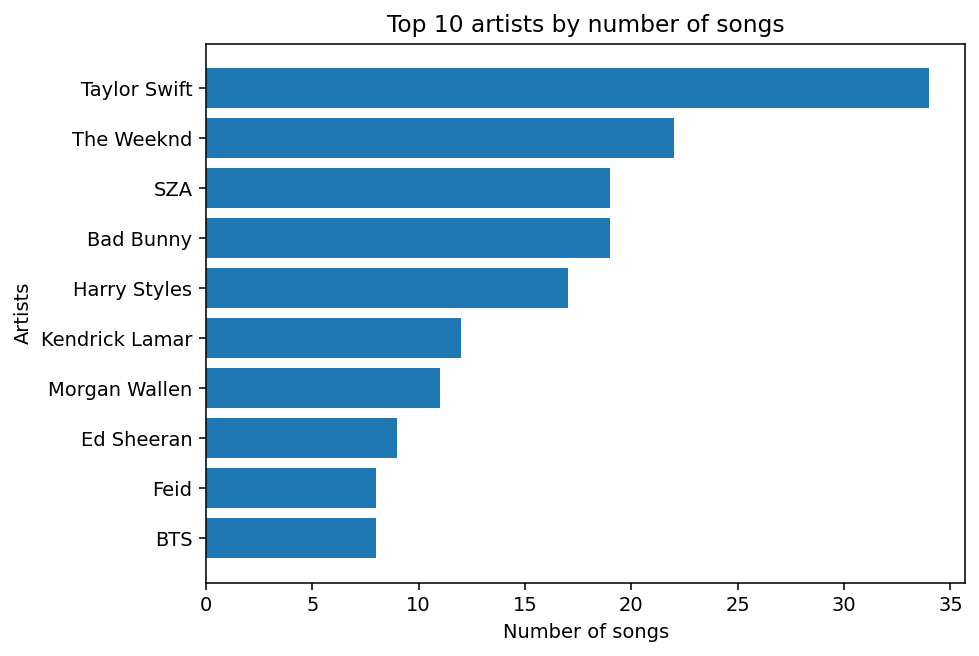

In [9]:
#YOUR CODE HERE
top_artists = top_artists.sort_values(ascending=True)

plt.figure(figsize=(7, 5), dpi=140)
plt.barh(top_artists.index, top_artists.values)
plt.title('Top 10 artists by number of songs')
plt.xlabel('Number of songs')
plt.ylabel('Artists')
plt.show()

# Find Top 10 most streamed songs

<b><font color='#8B0000'>TASK</font></b>

Create a variable `top_spotify_streams` which contains a DataFrame with top 10 most streamed songs on Spotify. The DataFrame should contain 3 columns - 'track_name', 'artist(s)_name' and 'streams'.

In [10]:
#YOUR CODE HERE
top_spotify_streams = spotify_data.sort_values('streams', ascending=False).head(10)[['track_name', 'artist(s)_name', 'streams']]
print(top_spotify_streams.head(10))


                           track_name                      artist(s)_name  \
189                 Take Me To Church                              Hozier   
187                           Circles                         Post Malone   
762                     Love Yourself                       Justin Bieber   
623                         All of Me                         John Legend   
157                    Counting Stars                         OneRepublic   
80                            Riptide                           Vance Joy   
720           Wake Me Up - Radio Edit                              Avicii   
126  Can't Hold Us (feat. Ray Dalton)  Ray Dalton, Ryan Lewis, Macklemore   
325                         The Hills                          The Weeknd   
672                           HUMBLE.                      Kendrick Lamar   

        streams  
189  2135158446  
187  2132335812  
762  2123309722  
623  2086124197  
157  2011464183  
80   2009094673  
720  1970673297  
126  195

<b><font color='#8B0000'>TASK</font></b>

Create a **horizontal bar plot** which presents the Top 10 most streamed songs

***REQUIREMENTS:***
- figure DPI should be **130**
 - figure size should be **(7, 5)**
 - figure title should be **'Top 10 most streamed songs'**
 - x label should be **'Number of streams (in billions)'**
 - y label should be **'Song name'**
 - top song should be on the top of the bar plot, bottom song at the bottom

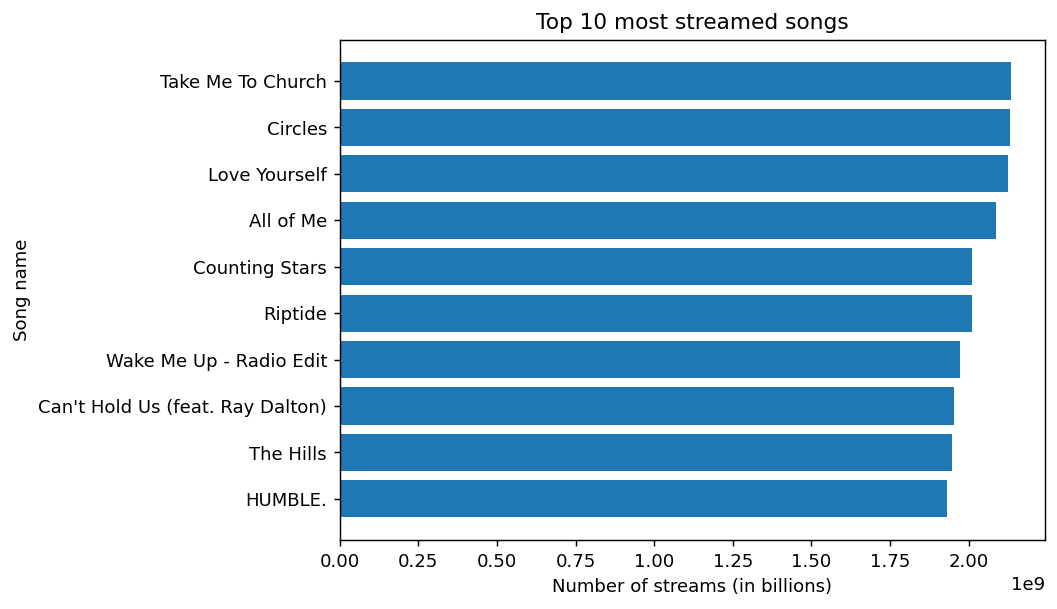

In [11]:
#YOUR CODE HERE

top_songs = spotify_data.sort_values('streams', ascending=False).head(10).sort_values('streams', ascending=True)


plt.figure(figsize=(7, 5), dpi=130)
plt.barh(top_songs['track_name'], top_songs['streams'])
plt.title('Top 10 most streamed songs')
plt.xlabel('Number of streams (in billions)')
plt.ylabel('Song name')
plt.show()

# Explore danceability

<b><font color='#8B0000'>TASK</font></b>

Create a **histogram** which presents the distribution of the the variable 'danceability_%'.

***REQUIREMENTS:***
- figure DPI should be **140**
 - figure size should be **(10, 6)**
 - the histogram should have **20 bins**
 - bins should be colored in **'purple'**
 - figure title should be **'Distribution of Danceability'**
 - x label should be **'Danceability (%)'**
 - y label should be **'Frequency'**


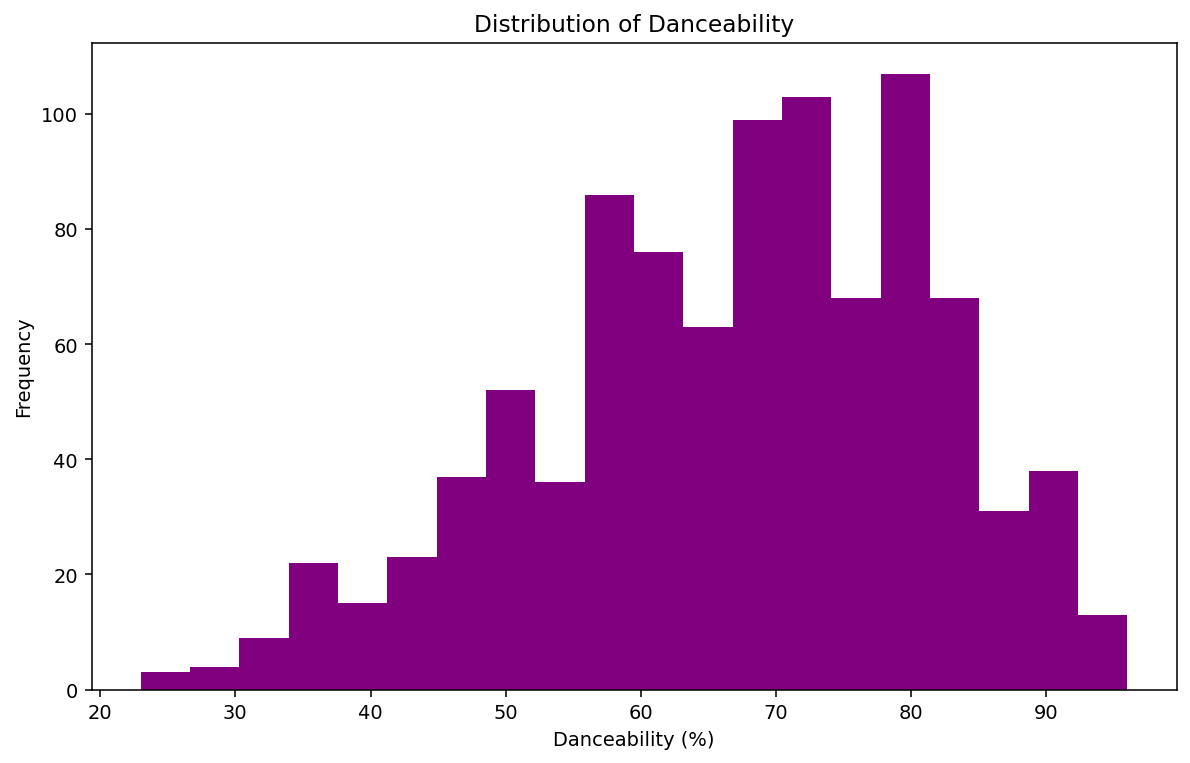

In [12]:
#YOUR CODE HERE


plt.figure(figsize=(10, 6), dpi=140)
plt.hist(spotify_data['danceability_%'], bins=20, color='purple')
plt.title('Distribution of Danceability')
plt.xlabel('Danceability (%)')
plt.ylabel('Frequency')
plt.show()


<b><font color='#8B0000'>TASK</font></b>

Create a variable `average_danceability_by_year` which stores the **average danceability per year**.

In [13]:
#YOUR CODE HERE
average_danceability_by_year = spotify_data.groupby('released_year')['danceability_%'].mean().astype(int)
print(average_danceability_by_year)

released_year
1930    65
1942    23
1946    36
1950    60
1952    67
1957    62
1958    70
1959    57
1963    37
1968    74
1970    51
1971    33
1973    39
1975    44
1979    75
1982    69
1983    82
1984    65
1985    63
1986    52
1987    45
1991    48
1992    53
1994    34
1995    70
1996    89
1997    74
1998    32
1999    77
2000    63
2002    73
2003    42
2004    68
2005    63
2007    52
2008    64
2010    61
2011    60
2012    61
2013    57
2014    63
2015    53
2016    63
2017    63
2018    55
2019    60
2020    67
2021    68
2022    68
2023    70
Name: danceability_%, dtype: int32


<b><font color='#8B0000'>TASK</font></b>

Create a **line plot** which presents average danceability over the years.

***REQUIREMENTS:***
- figure DPI should be **140**
 - figure size should be **(10, 6)**
 - figure title should be **'Trends in Danceability Over the Years'**
 - x tick should be rotated at **45 degrees**
 - x label should be **'Year'**
 - y label should be **'Average Danceability (%)'**
 - color of the line should be 'blue'


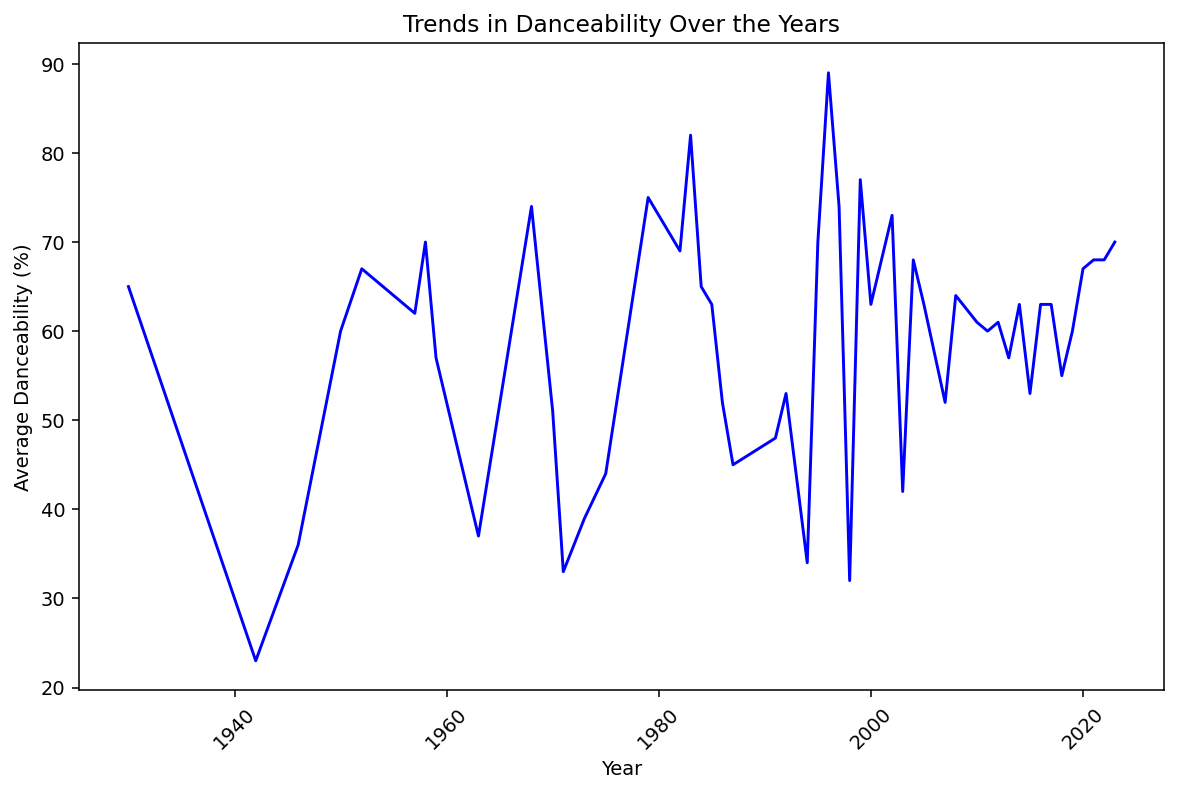

In [14]:
#YOUR CODE HERE
plt.figure(figsize=(10, 6), dpi=140)
plt.plot(average_danceability_by_year.index, average_danceability_by_year.values, color='blue')
plt.title('Trends in Danceability Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Danceability (%)')
plt.xticks(rotation=45)
plt.show()

# PART TWO - WORKING WITH TEXT

Underneath you will find raw text which you should format according to the given final version of the text. Please, input your final, formatted text, in the last cell of the notebook denoted with the comment _#YOUR FINAL TEXT HERE_.

### Raw text

Spotify is a Swedish audio streaming and media services provider founded on 23 April 2006 by Daniel Ek and Martin Lorentzon. It is one of the largest music streaming service providers, with over 590 million monthly active users, including 226 million paying subscribers, as of September 2023. Spotify is listed on the New York Stock Exchange in the form of American depositary receipts.

Spotify offers digital copyright restricted recorded audio content, including more than 100 million songs and five million podcasts, from record labels and media companies. As a freemium service, basic features are free with advertisements and limited control, while additional features, such as offline listening and commercial-free listening, are offered via paid subscriptions. Users can search for music based on artist, album, or genre, and can create, edit, and share playlists.

As of December 2023, Spotify was the 47th most-visited website in the world with 24.78% of its traffic coming from the United States followed by Brazil with 6.51% according to data provided by Semrush here (insert the following hyperlink https://www.semrush.com/trending-websites/global/all).

### Final text - example

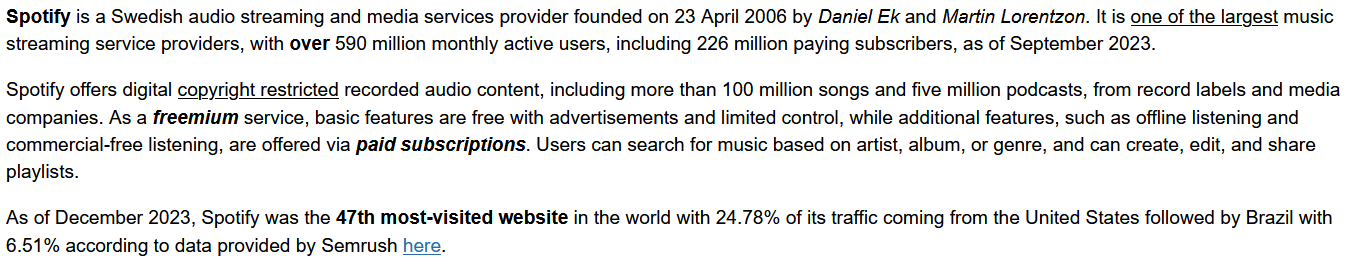

In [15]:
#YOUR FINAL TEXT HERE


**Spotify** is a Swedish audio streaming and media services provider founded on 23 April 2006 by *Daniel Ek* and *Martin Lorentzon*. It is <u>one of the largest</u> music streaming service providers, with **over** 590 million monthly active users, including 226 million paying subscribers, as of September 2023.

Spotify offers digital <u>copyright restricted</u> recorded audio content, including more than 100 million songs and five million podcasts, from record labels and media companies. As a ***freemium*** service, basic features are free with advertisements and limited control, while additional features, such as offline listening and commercial-free listening, are offered via ***paid subscriptions***. Users can search for music based on artist, album, or genre, and can create, edit, and share playlists.

As of December 2023, Spotify was the **47th most-visited website** in the world with 24.78% of its traffic coming from the United States followed by Brazil with 6.51% according to data provided by Semrush here <a href="https://www.semrush.com/trending-websites/global/all)" target="_blank">here</a>.

